In [20]:
!pip install -q pyqt5

You should consider upgrading via the 'c:\hcgalvan\repositorios\hcgalvan_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [23]:
!pip install -U --upgrade pip

Intervencional vs Observacional: Si podemos intervenir/experimentar,
la identificación de los efectos causales es relativamente fácil. Esto se debe simplemente a que podemos tomar la acción cuyo efecto causal queremos medir y simplemente medir el efecto después de tomar esa acción. Los datos de observación es donde se vuelve más complicado porque casi siempre se introduce confusión en los datos

In [1]:
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
DATA_PATH = "../data/union/End"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "dataset_final.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_data_prep()

In [4]:
df.label.value_counts()

label
1    42
0    25
Name: count, dtype: int64

In [ ]:
bins=np.linspace(0.0,1.0,10)
N=10
a=0.0
b=1.0
experimentos=random.rand(N)
data = [experimentos[:m] for m in [10,100,1000,10000,100000,1000000]]
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4,density='True')
  plt.plot(bins,[(1.0/(b-a)) for i in range(len(bins))], color='black', linestyle='dotted')
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

In [56]:
N=1000000
experimentos=random.rand(N)
medias=[]
desviaciones=[]
for m in [10,100,1000,10000,100000,1000000]:
  medias.append(np.mean(experimentos[:m]))
  desviaciones.append(np.std(experimentos[:m]))

In [11]:
data1 = df[df['label'] == 0]
#data1 = data1.drop(['cod', 'label'], axis=1).groupby(by='afsl_qa').mean()
# The correlation between all pairs of variables is easily computed with Pandas.
corr_matrix =  data1.drop(['cod', 'label'], axis=1).corr()
print(corr_matrix.shape)
corr_matrix.iloc[:10, :10]

(290, 290)


,afsl_ad,afsl_area_of_end_region_1,afsl_area_of_end_region_2,afsl_branch_volume,afsl_curl,afsl_diameter,afsl_dti_fa,afsl_elongation,afsl_irregularity,afsl_irregularity_of_end_region_1
afsl_ad,1.000000,0.068375,0.325416,-0.022432,-0.065547,0.180240,0.223872,0.098614,0.041468,-0.152805
afsl_area_of_end_region_1,0.068375,1.000000,0.419399,0.194251,0.621979,0.753514,0.184356,-0.500886,0.655989,-0.428427
afsl_area_of_end_region_2,0.325416,0.419399,1.000000,0.190747,0.111858,0.669082,0.603687,-0.496328,0.522362,-0.013426
afsl_branch_volume,-0.022432,0.194251,0.190747,1.000000,0.404178,0.268863,0.201496,-0.166069,0.469425,0.596828
afsl_curl,-0.065547,0.621979,0.111858,0.404178,1.000000,0.382524,-0.040878,-0.141479,0.518474,-0.199982
afsl_diameter,0.180240,0.753514,0.669082,0.268863,0.382524,1.000000,0.276997,-0.860713,0.855002,-0.198524
afsl_dti_fa,0.223872,0.184356,0.603687,0.201496,-0.040878,0.276997,1.000000,-0.131098,0.214032,0.176048
afsl_elongation,0.098614,-0.500886,-0.496328,-0.166069,-0.141479,-0.860713,-0.131098,1.000000,-0.821639,0.129870
afsl_irregularity,0.041468,0.655989,0.522362,0.469425,0.518474,0.855002,0.214032,-0.821639,1.000000,-0.039149
afsl_irregularity_of_end_region_1,-0.152805,-0.428427,-0.013426,0.596828,-0.199982,-0.198524,0.176048,0.129870,-0.039149,1.000000


In [12]:
labels = df.drop(['cod', 'label'], axis=1).columns[:10].values
data1.drop(['cod', 'label'], axis=1).columns[:10]

Index(['afsl_ad', 'afsl_area_of_end_region_1', 'afsl_area_of_end_region_2',
       'afsl_branch_volume', 'afsl_curl', 'afsl_diameter', 'afsl_dti_fa',
       'afsl_elongation', 'afsl_irregularity',
       'afsl_irregularity_of_end_region_1'],
      dtype='object')

In [13]:
correlation_mat = corr_matrix
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
sorted_pairs

fatr_span                    fatr_curl                     -0.925564
fatr_curl                    fatr_span                     -0.925564
fatl_diameter                fatl_elongation               -0.922751
fatl_elongation              fatl_diameter                 -0.922751
cfpl_rd                      cfpl_dti_fa                   -0.919458
                                                              ...   
slfl_radius_of_end_region_2  slfl_radius_of_end_region_2    1.000000
slfl_rd                      slfl_rd                        1.000000
slfl_rdi                     slfl_rdi                       1.000000
fatl_volume                  fatl_volume                    1.000000
ufsr_volume                  ufsr_volume                    1.000000
Length: 84100, dtype: float64


In [18]:
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

fatr_span                       fatr_curl                   -9.255637e-01
fatr_curl                       fatr_span                   -9.255637e-01
fatl_diameter                   fatl_elongation             -9.227506e-01
fatl_elongation                 fatl_diameter               -9.227506e-01
cfpl_rd                         cfpl_dti_fa                 -9.194578e-01
                                                                 ...     
fatl_total_area_of_end_regions  slfr_mean_length            -7.006225e-05
ufsl_mean_length                afsr_span                   -1.515988e-05
afsr_span                       ufsl_mean_length            -1.515988e-05
cfpl_span                       slfl_area_of_end_region_2   -2.686665e-07
slfl_area_of_end_region_2       cfpl_span                   -2.686665e-07
Length: 32970, dtype: float64


In [98]:
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.7) & (abs(sorted_pairs) < 1)]
strong_pairs.to_csv('../data/union/End/strong_pairs.csv')
print(strong_pairs)

fatr_span        fatr_curl         -0.925564
fatr_curl        fatr_span         -0.925564
fatl_diameter    fatl_elongation   -0.922751
fatl_elongation  fatl_diameter     -0.922751
cfpl_rd          cfpl_dti_fa       -0.919458
                                      ...   
afsl_rdi         afsl_nrdi02L       0.999999
cfpr_nrdi02L     cfpr_rdi           0.999999
cfpr_rdi         cfpr_nrdi02L       0.999999
cfpl_nrdi02L     cfpl_rdi           0.999999
cfpl_rdi         cfpl_nrdi02L       0.999999
Length: 5028, dtype: float64


In [56]:
strong_pairs.info()

<class 'pandas.core.series.Series'>
MultiIndex: 5318 entries, ('fatr_span', 'fatr_curl') to ('ufsr_volume', 'ufsr_volume')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5318 non-null   float64
dtypes: float64(1)
memory usage: 83.1+ KB


In [97]:
print(strong_pairs.groupby(level=0).filter(lambda x: len(x)>=2).sort_values(ascending=True)[:10])

cfpl_rdi                           cfpl_nrdi02L                         0.999999
cfpl_nrdi02L                       cfpl_rdi                             0.999999
cfpr_rdi                           cfpr_nrdi02L                         0.999999
cfpr_nrdi02L                       cfpr_rdi                             0.999999
afsl_rdi                           afsl_nrdi02L                         0.999999
                                                                          ...   
slfl_diameter                      slfl_elongation                     -0.863825
slfl_elongation                    slfl_diameter                       -0.863825
cfpr_irregularity_of_end_region_2  cfpr_diameter                       -0.871391
cfpr_diameter                      cfpr_irregularity_of_end_region_2   -0.871391
afsr_elongation                    afsr_diameter                       -0.875851
Length: 4979, dtype: float64


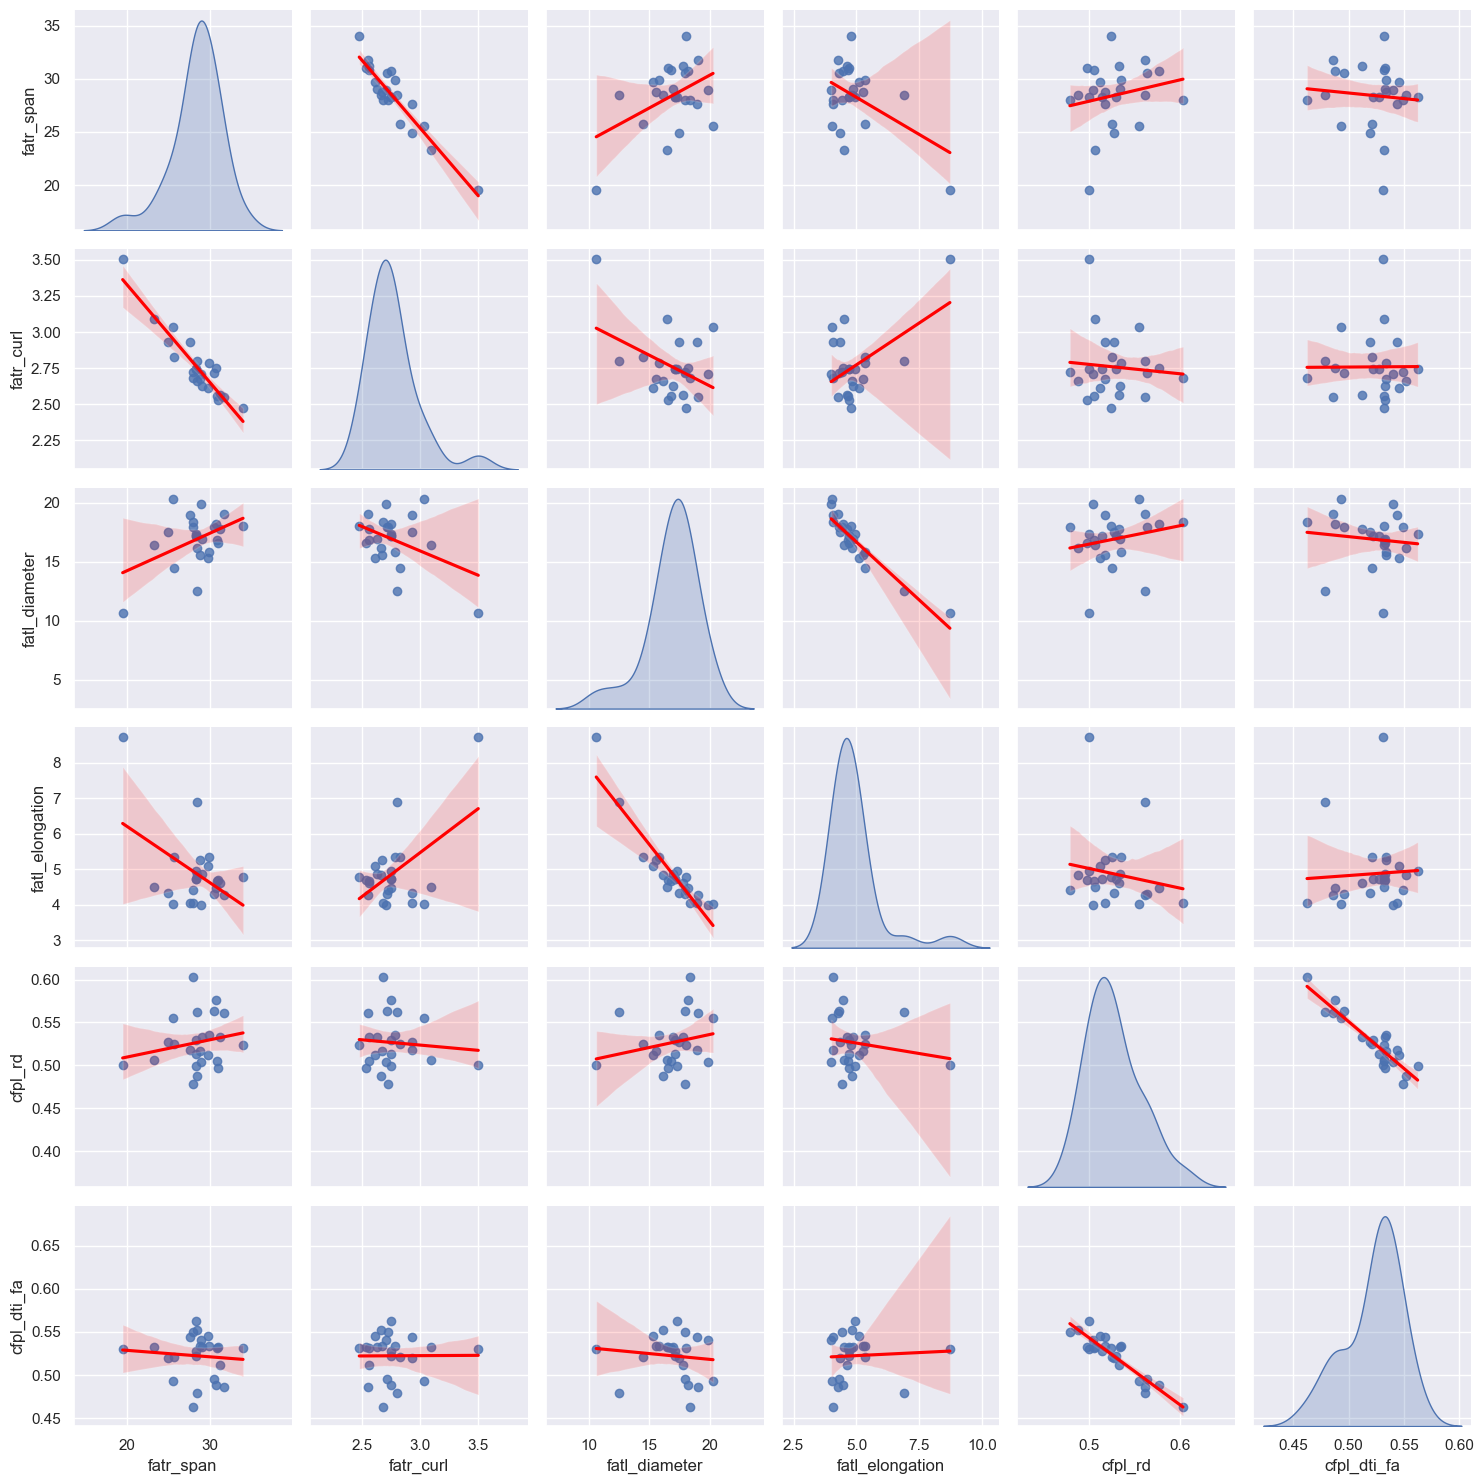

In [87]:
# Scatter plot:
labels=['fatr_span', 'fatr_curl',
       'fatl_diameter', 'fatl_elongation', 'cfpl_rd', 'cfpl_dti_fa']
sns.set()
sns.pairplot(data1[labels],kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}, size = 2.5)
plt.tight_layout()
plt.show();

In [ ]:
afsl_rdi         afsl_nrdi02L       0.999999
cfpr_nrdi02L     cfpr_rdi           0.999999
cfpr_rdi         cfpr_nrdi02L       0.999999
cfpl_nrdi02L     cfpl_rdi           0.999999
cfpl_rdi         cfpl_nrdi02L       0.999999

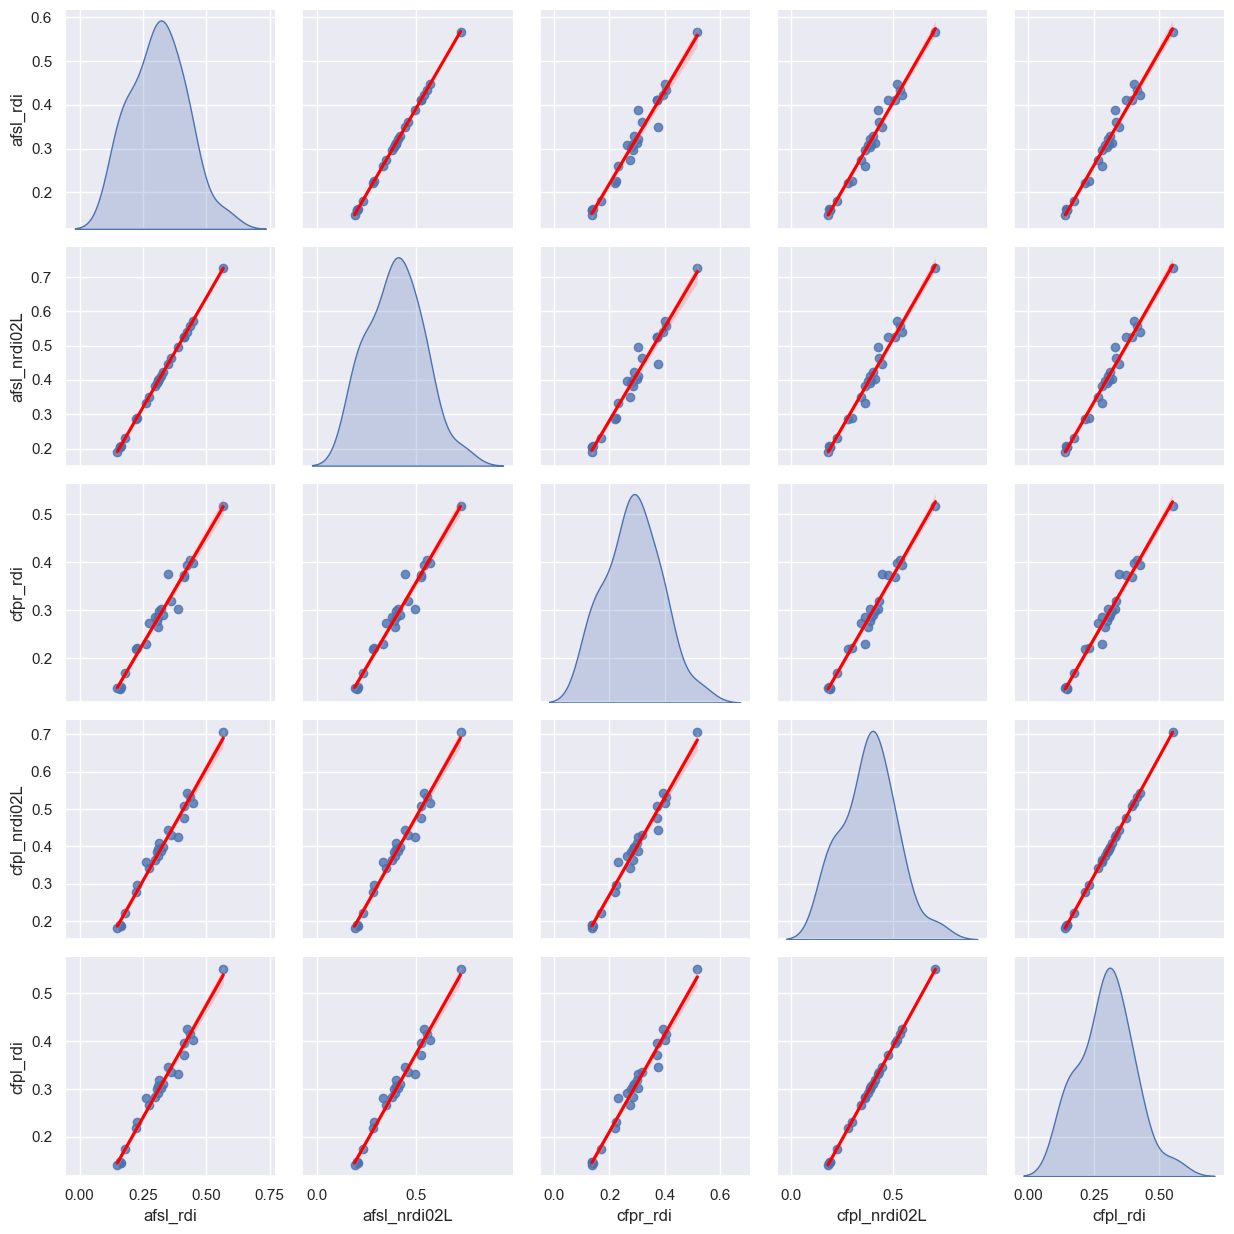

In [95]:
# Scatter plot:
labels=['afsl_rdi', 'afsl_nrdi02L',
   'cfpr_rdi', 'cfpl_nrdi02L', 'cfpl_rdi']
sns.set()
sns.pairplot(data1[labels],kind='reg', diag_kind='kde', plot_kws={'line_kws': {'color': 'red'}}, size = 2.5)
plt.tight_layout()
plt.show();

In [54]:
strong_pairs.iloc[2:10]

fatl_diameter    fatl_elongation   -0.922751
fatl_elongation  fatl_diameter     -0.922751
cfpl_rd          cfpl_dti_fa       -0.919458
cfpl_dti_fa      cfpl_rd           -0.919458
cfpr_rd          cfpr_dti_fa       -0.909187
cfpr_dti_fa      cfpr_rd           -0.909187
fatr_diameter    fatr_elongation   -0.908698
fatr_elongation  fatr_diameter     -0.908698
dtype: float64

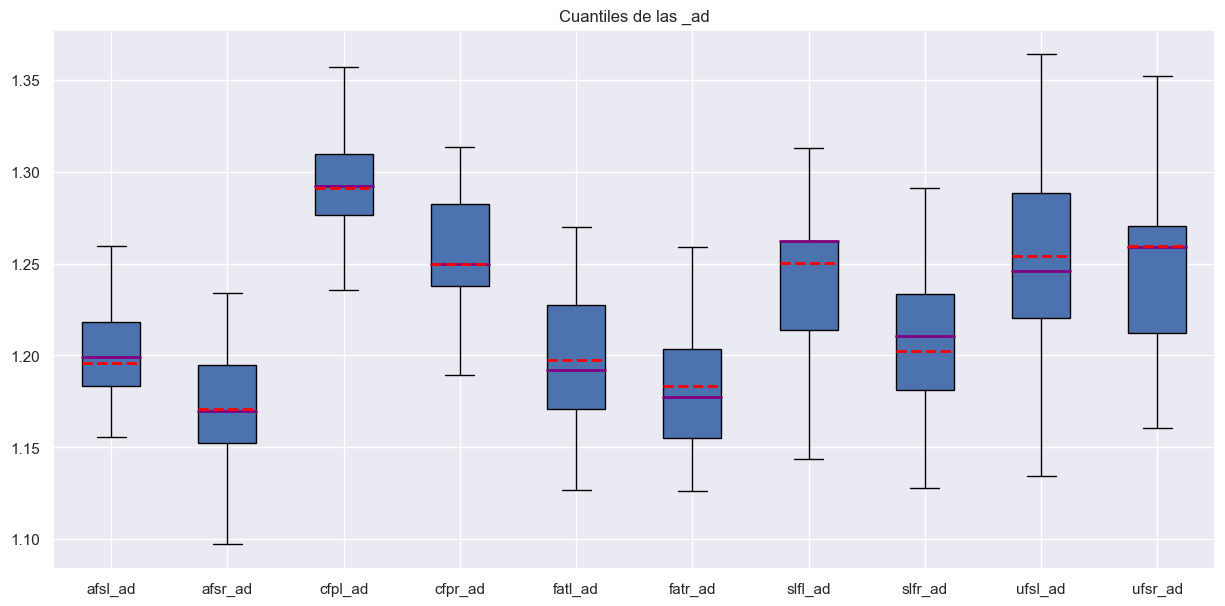

In [222]:
from matplotlib.pyplot import boxplot
data = df[df['label'] == 0]
data = data[['afsl_ad', 'afsr_ad', 'cfpl_ad', 'cfpr_ad','fatl_ad','fatr_ad','slfl_ad','slfr_ad','ufsl_ad','ufsr_ad']]
fig, ax = plt.subplots( figsize=(15, 7))
ax.set_title('Cuantiles de las _ad')
ax.boxplot(data, showfliers=False, showmeans=True, meanline=True, 
           labels=['afsl_ad', 'afsr_ad', 'cfpl_ad', 'cfpr_ad','fatl_ad','fatr_ad','slfl_ad','slfr_ad','ufsl_ad','ufsr_ad'], 
           patch_artist=True, medianprops={'linewidth': 2, 'color': 'purple'}, 
           meanprops={'linewidth': 2, 'color': 'red'})
fig.show()

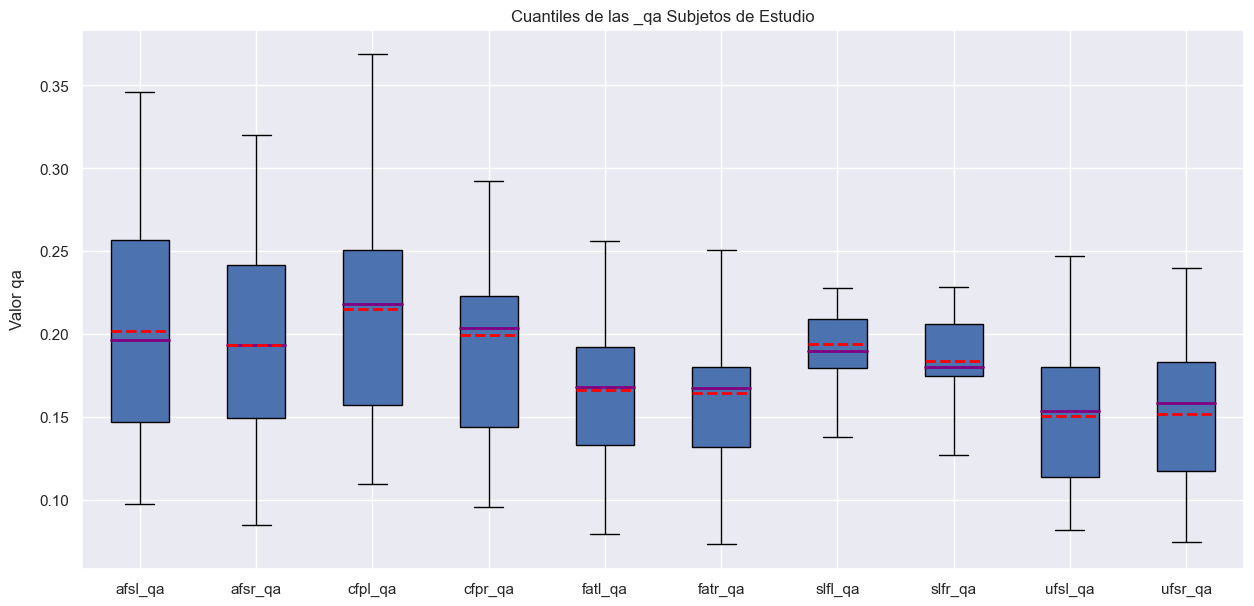

In [223]:
from matplotlib.pyplot import boxplot

data = df[df['label'] == 0]
data = data[['afsl_qa', 'afsr_qa', 'cfpl_qa', 'cfpr_qa','fatl_qa','fatr_qa','slfl_qa','slfr_qa','ufsl_qa','ufsr_qa']]
fig, ax = plt.subplots( figsize=(15, 7))
ax.set_title('Cuantiles de las _qa Subjetos de Estudio')
ax.boxplot(data, showfliers=False, showmeans=True, meanline=True, 
           labels=['afsl_qa', 'afsr_qa', 'cfpl_qa', 'cfpr_qa','fatl_qa','fatr_qa','slfl_qa','slfr_qa','ufsl_qa','ufsr_qa'], 
           patch_artist=True, medianprops={'linewidth': 2, 'color': 'purple'}, 
           meanprops={'linewidth': 2, 'color': 'red'}, 
           vert=True, widths=0.5, whis=1.5, showbox=True, showcaps=True)
ax.set_ylabel("Valor qa", labelpad=10)
fig.show( )

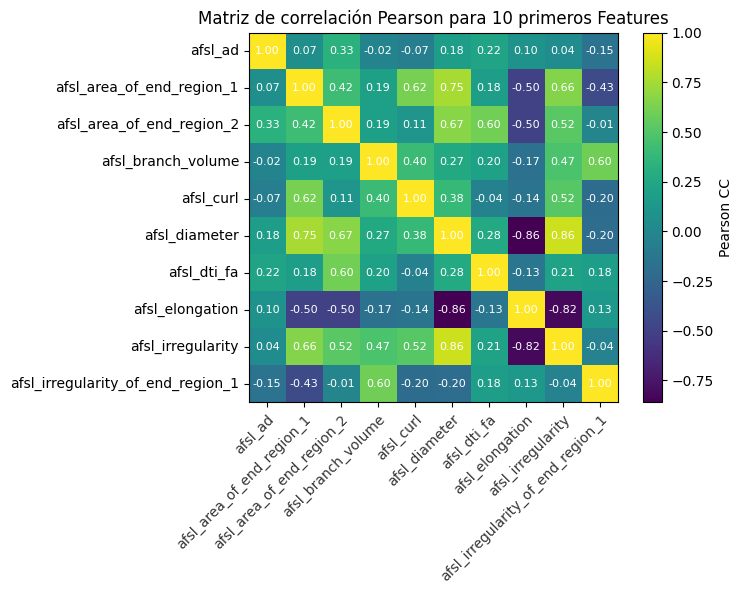

In [196]:
plt.imshow(corr_matrix.iloc[:10, :10])
for i in range(10):
    for j in range(10):
        plt.text(i, j, "{:.2f}".format(corr_matrix.iloc[i, j]), ha='center', va='center', color='w', fontsize=8)
        
plt.title ('Matriz de correlación Pearson para 10 primeros Features')
xt = plt.xticks(np.arange(10), labels, rotation=45, ha='right', va='top', rotation_mode='anchor', alpha=0.8, label='x-axis')
yt = plt.yticks(np.arange(10), labels, rotation=0, ha='right', va='center')
plt.colorbar(label='Pearson CC')


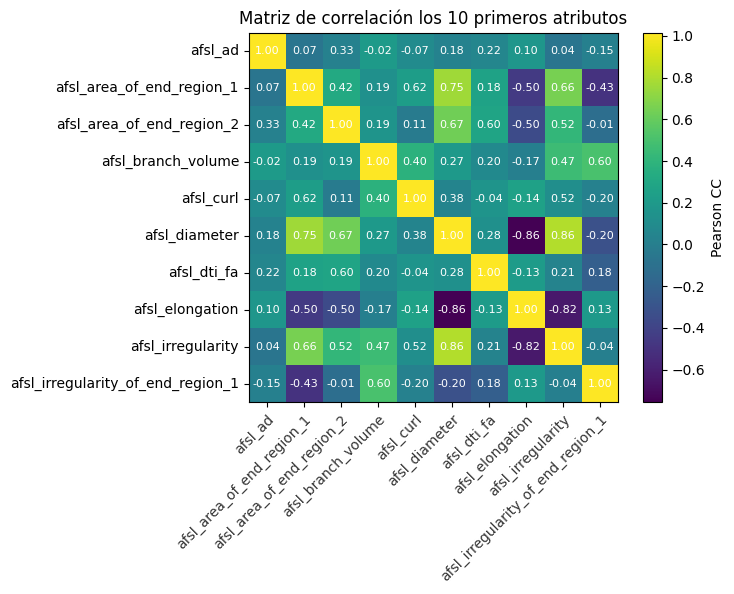

In [197]:
data2 = df.drop(['cod', 'label'], axis=1).values
cov = np.cov(data2.T)
#compute standard deviations of each of the 290 features
stds = np.std(data2, axis = 0) #shape = (290,)
stds_matrix = np.array([[stds[i]*stds[j] for j in range(290)] for i in range(290)])
new_corr = cov/stds_matrix
plt.imshow(new_corr[:10, :10])
for i in range(10):
    for j in range(10):
        plt.text(i, j, "{:.2f}".format(corr_matrix.iloc[i, j]), ha='center', va='center', color='w', fontsize=8)

plt.title ('Matriz de correlación los 10 primeros atributos')
xt = plt.xticks(np.arange(10), labels, rotation=45, ha='right', va='top', rotation_mode='anchor', alpha=0.8, label='x-axis')
yt = plt.yticks(np.arange(10), labels, rotation=0, ha='right', va='center')
plt.colorbar(label='Pearson CC')
#print("standard deviations matrix of shape:",stds_matrix.shape)

c:\hcgalvan\Repositorios\hcgalvan_project\venv\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


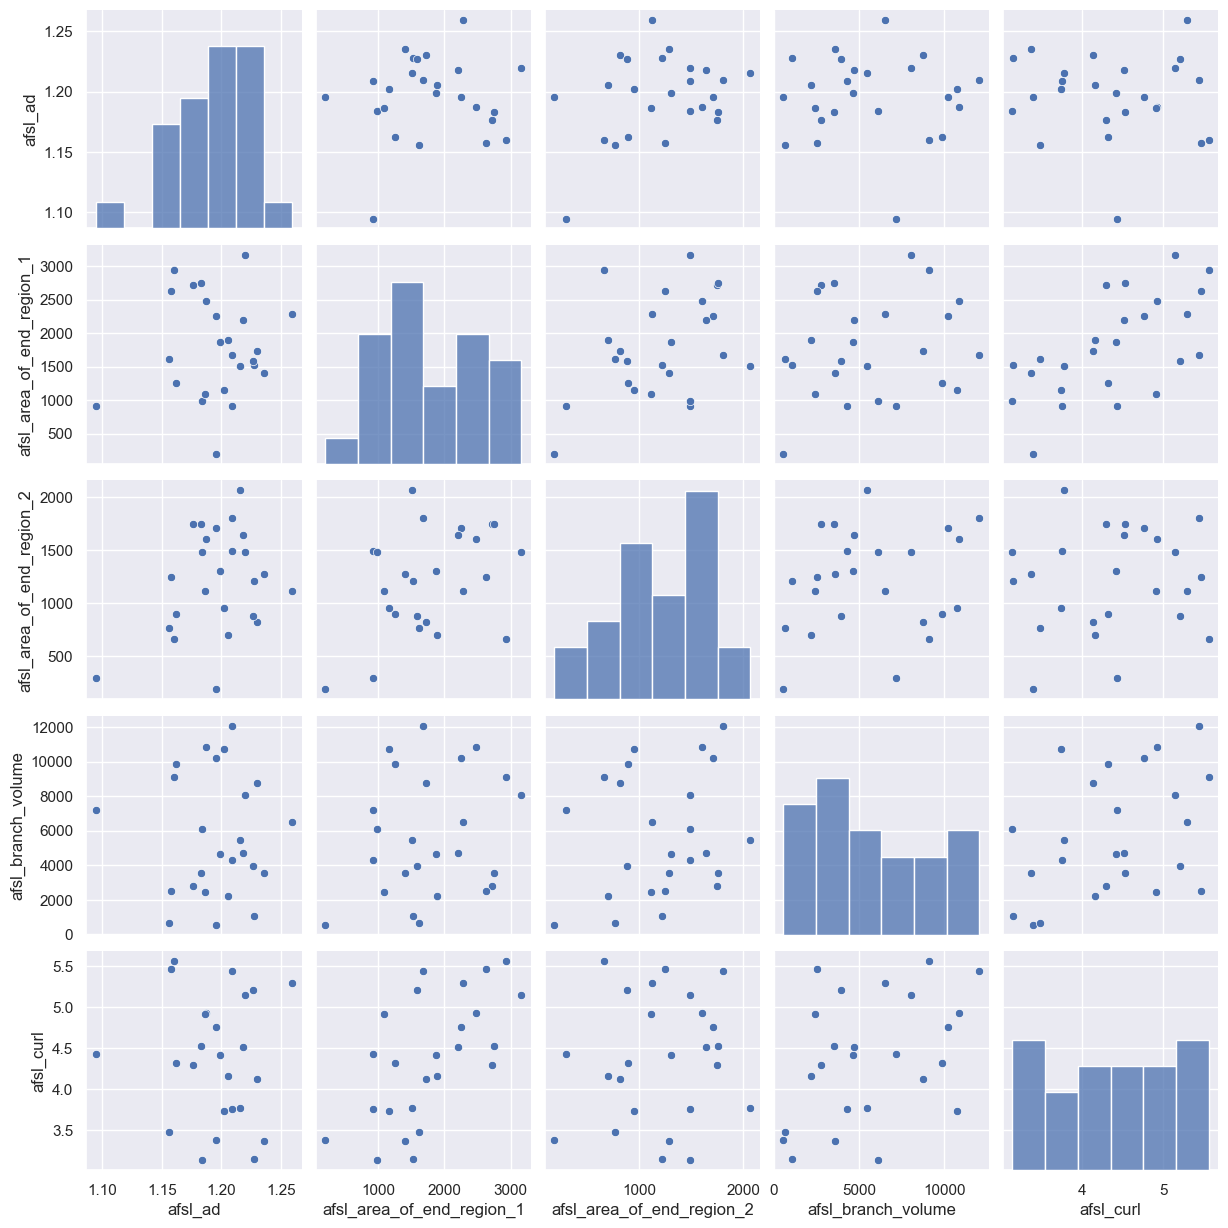

In [204]:
# Scatter plot:
labels=['afsl_ad', 'afsl_area_of_end_region_1',
       'afsl_area_of_end_region_2', 'afsl_branch_volume', 'afsl_curl']
sns.set()
sns.pairplot(data1[labels], size = 2.5)
plt.show();

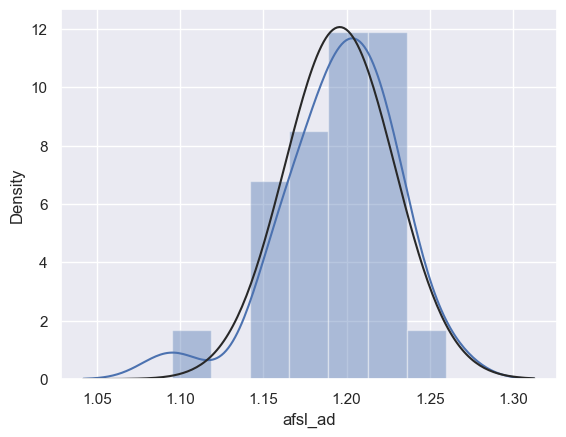

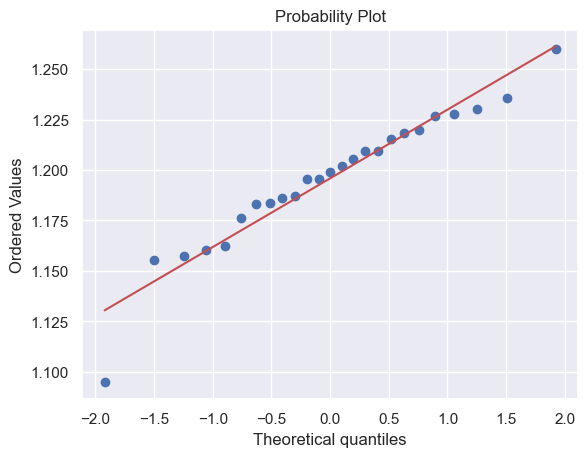

In [209]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(data1['afsl_ad'], fit = norm);
fig = plt.figure()
res = stats.probplot(data1['afsl_ad'], plot = plt)

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 42 to 66
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   afsl_qa  25 non-null     float64
 1   afsr_qa  25 non-null     float64
 2   cfpl_qa  25 non-null     float64
 3   cfpr_qa  25 non-null     float64
 4   fatl_qa  25 non-null     float64
 5   fatr_qa  25 non-null     float64
 6   slfl_qa  25 non-null     float64
 7   slfr_qa  25 non-null     float64
 8   ufsl_qa  25 non-null     float64
 9   ufsr_qa  25 non-null     float64
dtypes: float64(10)
memory usage: 2.1 KB


In [ ]:
data[['afsl_qa', 'afsr_qa', 'cfpl_qa', 'cfpr_qa','fatl_qa','fatr_qa','slfl_qa','slfr_qa','ufsl_qa','ufsr_qa']]


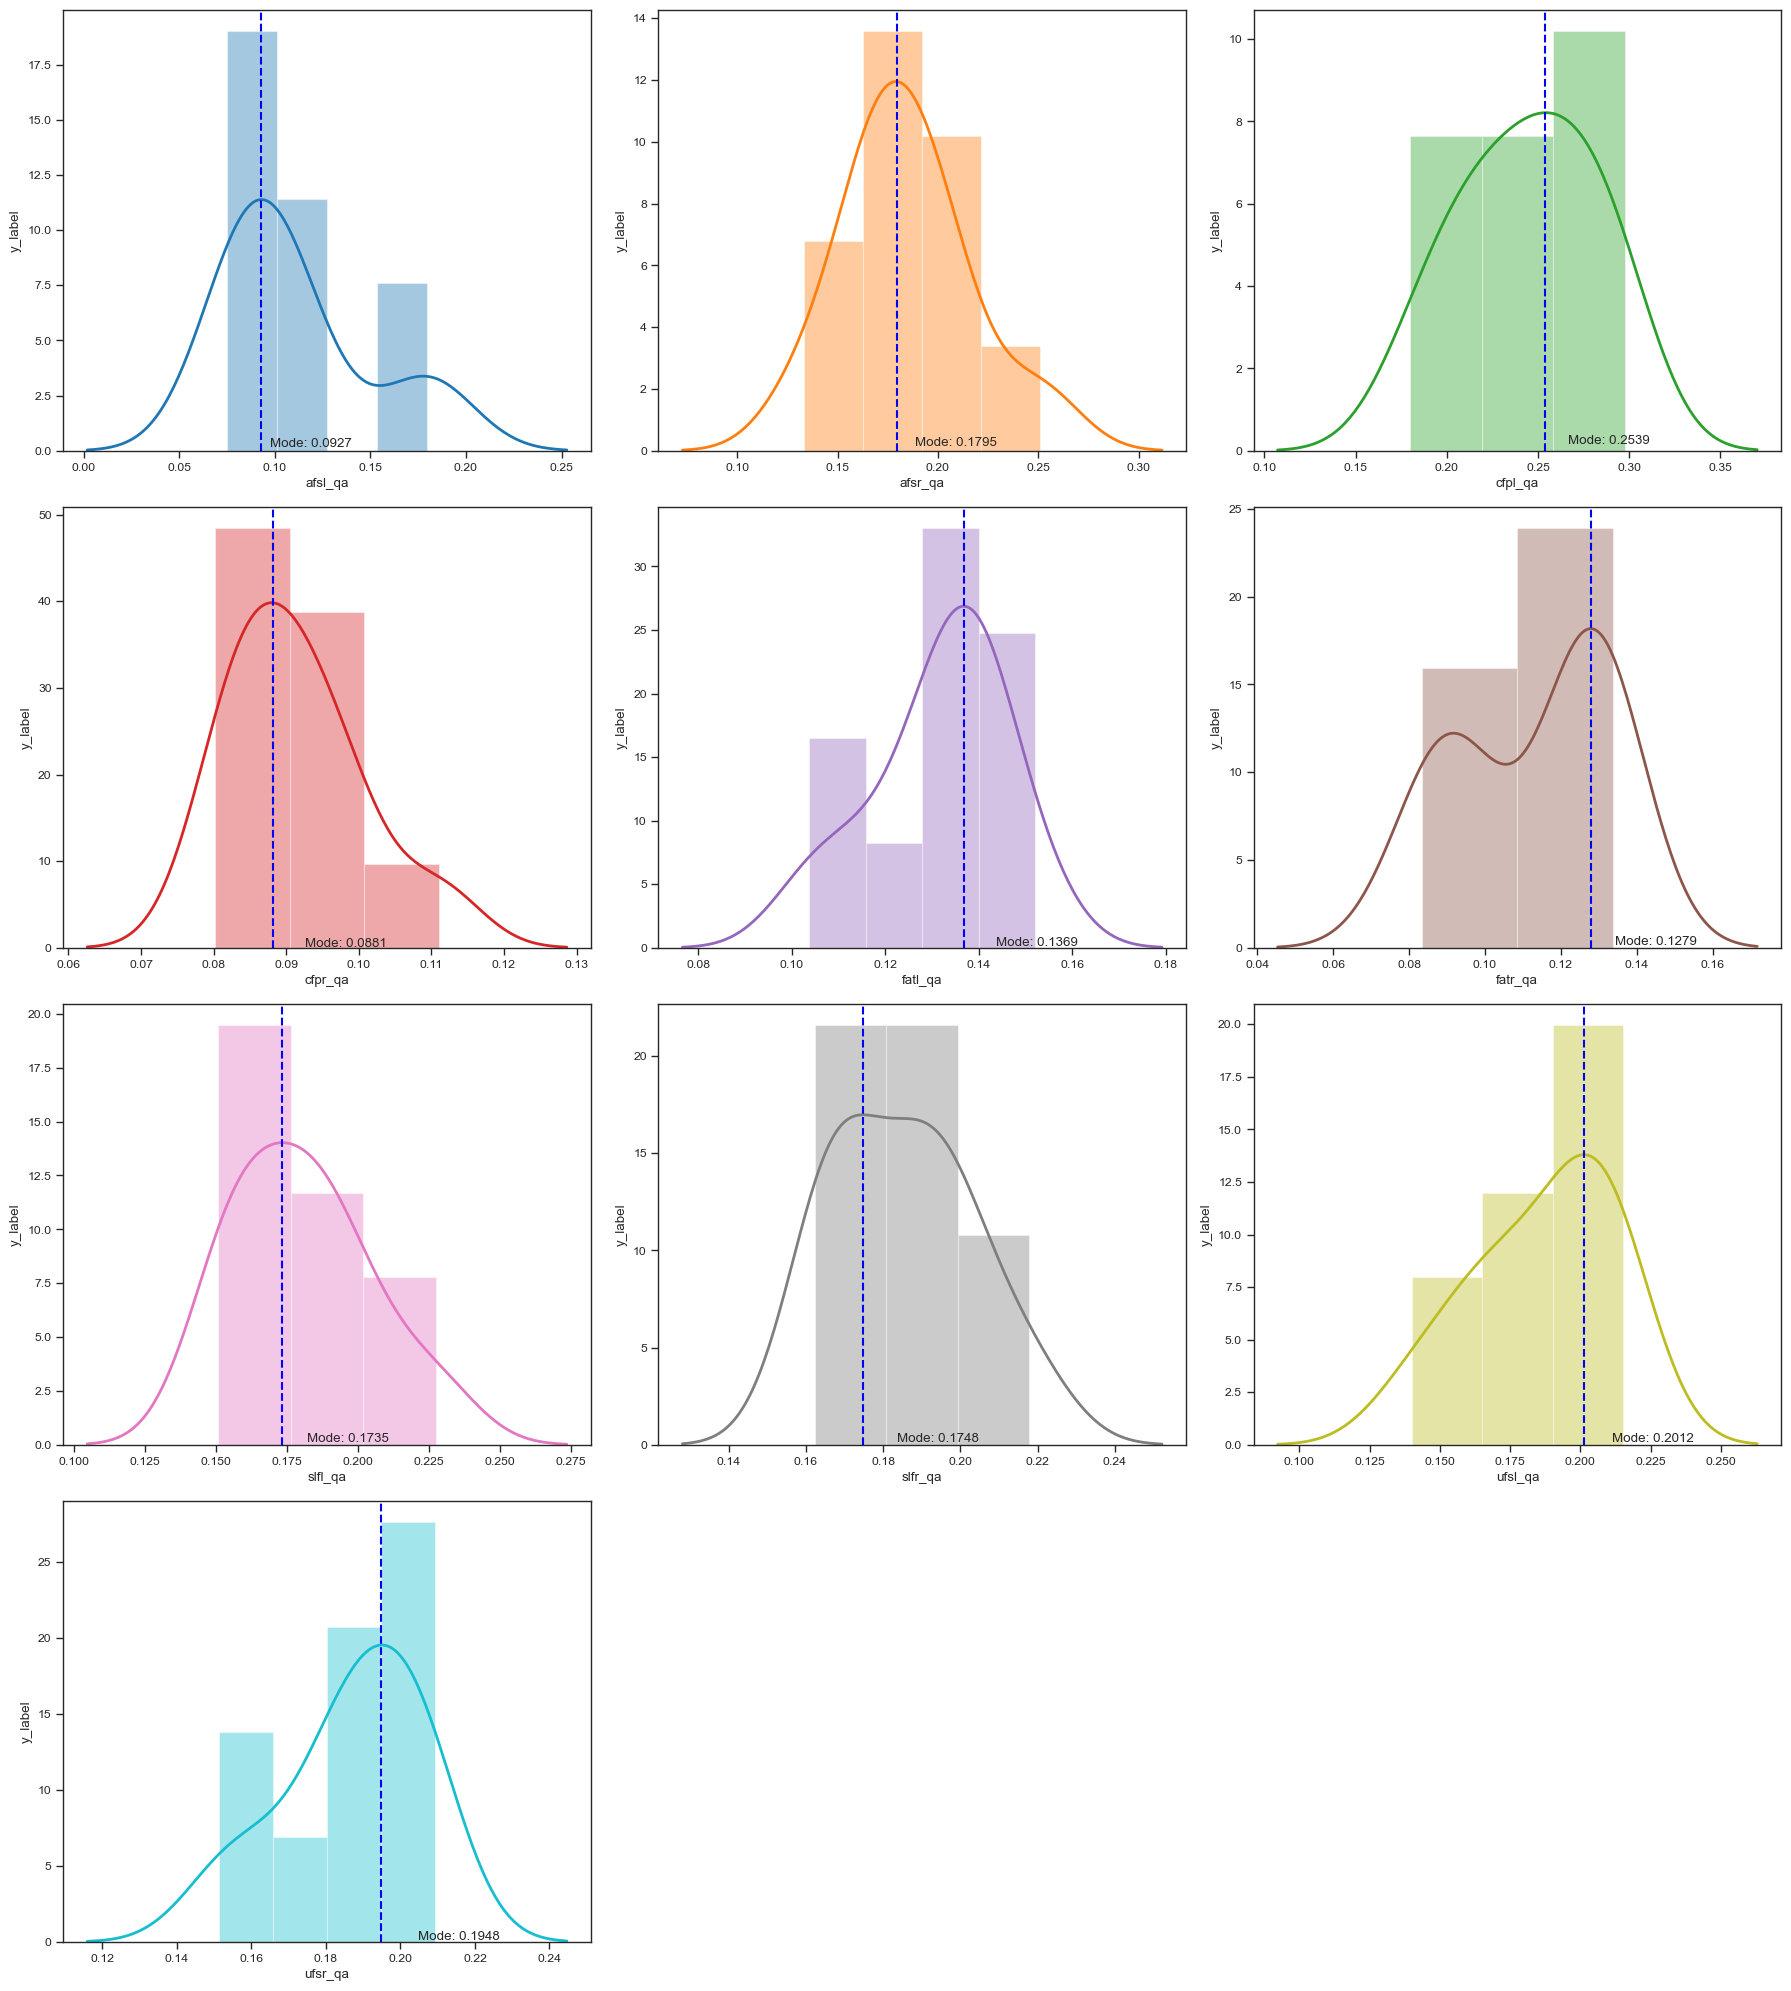

In [298]:
# function to plot the histogram for a single list.
def make_density(stat, color, x_label, y_label, ax):
    # Draw the histogram and fit a density plot.
    sns.distplot(stat, hist=True, kde=True,
                 kde_kws={'linewidth': 2}, color=color, ax=ax)

    # get the y-coordinates of the points of the density curve.
    dens_list = ax.get_lines()[0].get_data()[1]

    # find the maximum y-coordinates of the density curve.
    max_dens_index = dens_list.argmax()

    # find the mode of the density plot.
    mode_x = ax.get_lines()[0].get_data()[0][max_dens_index]

    # draw a vertical line at the mode of the histogram.
    ax.axvline(mode_x, color='blue', linestyle='dashed', linewidth=1.5)
    ax.text(mode_x * 1.05, 0.16, 'Mode: {:.4f}'.format(mode_x))

    # Plot formatting
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
stat_list = data[['afsl_qa', 'afsr_qa', 'cfpl_qa', 'cfpr_qa','fatl_qa','fatr_qa','slfl_qa','slfr_qa','ufsl_qa','ufsr_qa']].values
etiqueta = ['afsl_qa', 'afsr_qa', 'cfpl_qa', 'cfpr_qa','fatl_qa','fatr_qa','slfl_qa','slfr_qa','ufsl_qa','ufsr_qa']
num_subplots = len(stat_list[0,:])
ncols = 3
nrows = (num_subplots + ncols - 1) // ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 6, nrows * 5))
colors = plt.cm.tab10.colors
for ax, stat, color, i in zip(np.ravel(axes), stat_list, colors, etiqueta):
    make_density(stat, color, i, 'y_label', ax)
for ax in np.ravel(axes)[num_subplots:]:  # remove possible empty subplots at the end
    ax.remove()
fig.tight_layout()
plt.show()

In [297]:
len(stat_list[0,:])

10

In [ ]:
N=1
a=0.0
b=1.0
media_esperada=(a+b)*0.5
desviacion_estandar_esperada=(b-a)/np.sqrt(12)
plt.scatter(data[1:],medias)
plt.axhline(media_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\mu_{N}$')
plt.show()

plt.scatter(data[1:],desviaciones)
plt.axhline(desviacion_estandar_esperada,color='black',linestyle='dotted')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('$\sigma_{N}$')

In [ ]:
bins=np.linspace(0.0,1.0,10)
for dato in data:
  plt.hist(dato,bins=bins,color='blue',alpha=0.4,density='True')
  plt.plot(bins,[(1.0/(b-a)) for i in range(len(bins))], color='black', linestyle='dotted')
  plt.xlabel('$x$')
  plt.ylabel('$N_{\text{eventos}}$')
  plt.title('Histograma para '+str(len(dato))+' mediciones')
  plt.show()

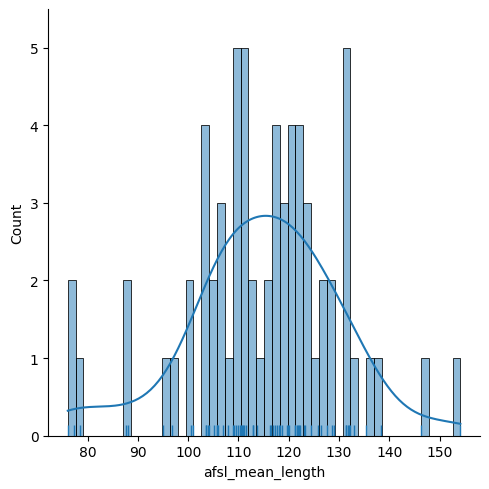

In [52]:
sns.displot(df['afsl_mean_length'], bins=50, kde=True, rug=True)